Directory .results/100iter cleared.
Directory .results/100iter created.
[1, -4.764244943857193, 0.6108870177071533, 1.1257886529841346, 0.5921692508607184, -0.0595049498844088, 0.46013460979135834, 0.0814854502463419]
[2, -5.768149793148041, 0.8624288580725417, 2.2076084663818865, 0.31522425264902904, -1.5895646396634113, 0.35675235229972657, -0.5562664810110207]
[3, -6.445092648267746, 0.871730020358634, 2.2503707707762706, 0.30543472181596426, -1.6504168051333965, 0.3497033075950309, -0.5845062136549943]
[4, -6.458088427782059, 0.8723189648710545, 2.2559362547971524, 0.3046606247000508, -1.6571299647882047, 0.3429284972774637, -0.5825983818945822]
[5, -6.460835129022598, 0.8705120944973727, 2.25736901223655, 0.3056221179227215, -1.6595582722139726, 0.33587530161066576, -0.5814086330793306]
[6, -6.46105283498764, 0.8661139815100283, 2.2567128242123133, 0.3072604667612411, -1.663261133610445, 0.3270806307432328, -0.5826282968885522]
[7, -6.461059182882309, 0.866084649337982, 2.25670365

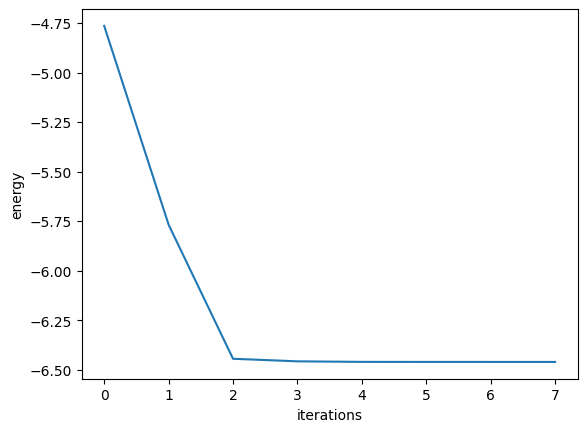

In [15]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
import shutil
import os
import csv
from expectation import get_expectation_afm_heisenberg, AFMHeisenbergArgs
from functools import partial

p = 3
length = 4
filepath_o = ".results/100iter"
filepath = "100iter"
figure = True

qsim_option = {'t': int(length / 2), 'f': 1}

initial_gamma = np.array([0.6 for i in range(p)])
initial_beta = np.array([0.6 for i in range(p)])
init_param = np.concatenate([initial_gamma, initial_beta])

def clear_and_recreate_directory(dir_path):
    try:
        if os.path.exists(dir_path):
            shutil.rmtree(dir_path)
            print(f"Directory {dir_path} cleared.")
        os.makedirs(dir_path)
        print(f"Directory {dir_path} created.")
    except Exception as e:
        print(f"Error occurred while trying to clear and recreate the directory: {e}")

function_args = AFMHeisenbergArgs(length, qsim_option)
function = partial(get_expectation_afm_heisenberg, function_args=function_args)

def energy_dummy(params):
    gamma, beta = np.split(params, 2)
    energy = function(gamma=gamma, beta=beta)
    return energy

# Define the gradient function
def numerical_gradient(func, params, epsilon=1e-2):
    grad = np.zeros_like(params)
    for i in range(len(params)):
        params_eps = np.array(params)
        params_eps[i] += epsilon
        grad[i] = (func(params_eps) - func(params)) / epsilon
    return grad

history_params = []
history_energy = []

def callback(params):
    history_params.append(params)
    history_energy.append(energy_dummy(params))
    gamma, beta = np.split(params, 2)
    record = [len(history_energy), energy_dummy(params)] + list(gamma) + list(beta)
    # Open the file in append mode and write the record
    with open(filepath, mode='a', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(record)
        if figure:
            print(record)
        f.flush()

clear_and_recreate_directory(filepath_o)

with open(filepath, mode='w', newline='') as f:
        writer = csv.writer(f)
        headline = ["iter", "energy"]
        for p in range(int(len(initial_gamma))):
            headline.append("gamma[{}]".format(p))
            headline.append("beta[{}]".format(p))
        writer.writerow(headline)

result = minimize(energy_dummy, init_param, method="L-BFGS-B", jac=lambda params: numerical_gradient(energy_dummy, params), callback=callback)

print(result)
print(history_params)
print(history_energy)

plt.plot(history_energy)
plt.xlabel("iterations")
plt.ylabel("energy")
plt.show()


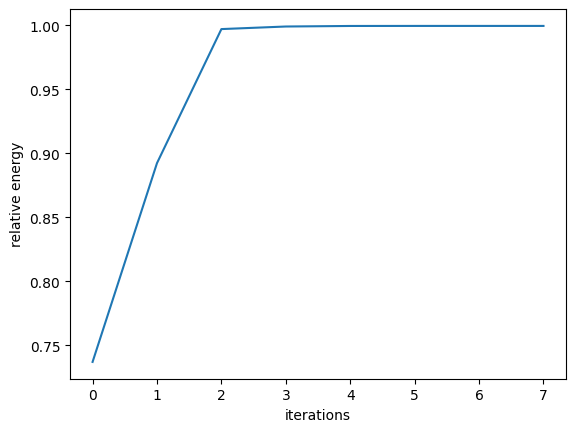

In [12]:
from exact_expectation import get_exact_expectation_afm_heisenberg
exact_energy, state = get_exact_expectation_afm_heisenberg(length)

plt.plot(history_energy/exact_energy)
plt.xlabel("iterations")
plt.ylabel("relative energy")
plt.show()


In [13]:
clear_directory(".results/100iter")

Directory .results/100iter cleared.
